In [1]:
from csv import reader
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from skimage import io

In [2]:
with open("meta.txt") as f:
    meta = dict(list(reader(f))[1:])
pprint(meta)
CONVERSION_FACTOR = meta["Overview_01.tif"]

{'Overview_01.tif': '1.515'}


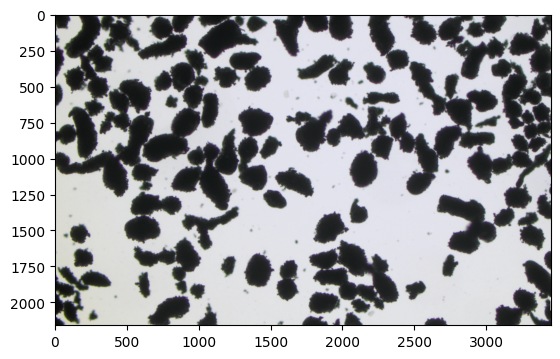

In [3]:
# Load an image from file
image = io.imread('Overview_03.tif')[:, :3450, :]
plt.imshow(image)

0.6260869565217392


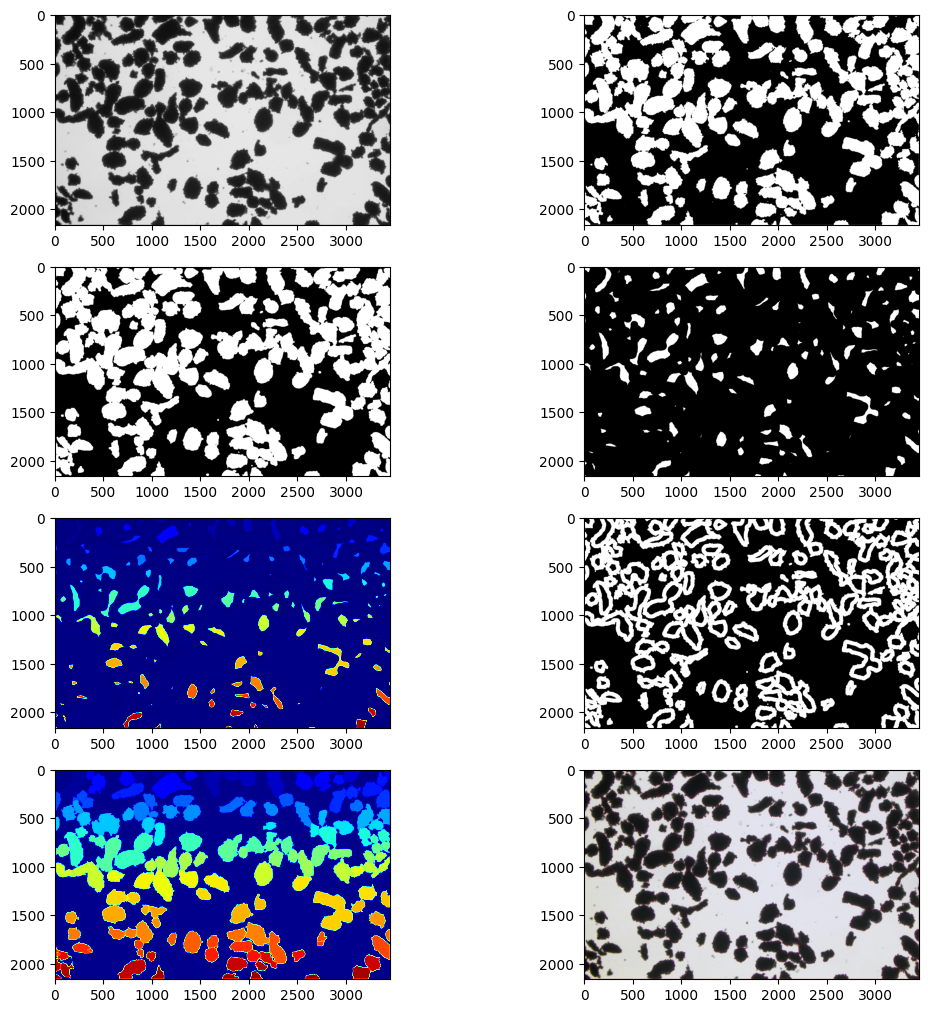

In [11]:
from Calculations.LM_images.Segmentation.utils import apply_watershed
processed, _ = apply_watershed(image, dist_transform_threshold=0.4)


In [5]:
# Find contours
import contourpy as cp

gen = cp.contour_generator(z=processed, fill_type="ChunkCombinedOffsetOffset")
lines = gen.lines(0.5)
filled = gen.filled(0, 255)



Text(0, 0.5, 'Count')

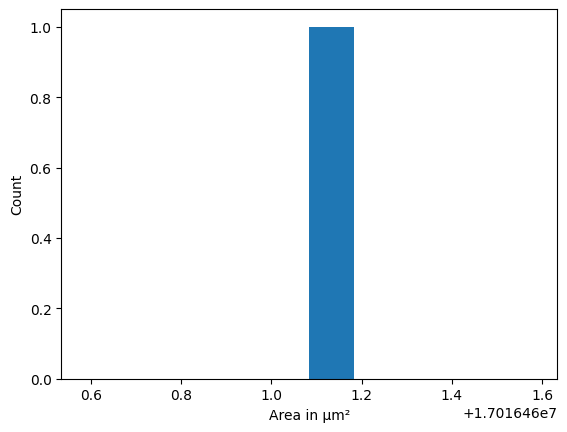

In [6]:
from shapely import GeometryType, from_ragged_array

points, offsets, outer_offsets = filled[0][0], filled[1][0], filled[2][0]
polygons = from_ragged_array(GeometryType.POLYGON, points, (offsets, outer_offsets)) 
pix2um = float(CONVERSION_FACTOR)**2
areas = [p.area*pix2um for p in polygons]
plt.figure()
plt.hist(areas, bins=10)
plt.xlabel("Area in µm²")
plt.ylabel("Count")

In [7]:
# Control
r = 65/2 * float(CONVERSION_FACTOR)
print("Expected area:", np.pi*r**2)

poly = polygons[17]
plt.plot(poly.exterior.xy[0], poly.exterior.xy[1])
plt.axis('equal')
print(poly.area*pix2um)
print("width:", poly.bounds[2]-poly.bounds[0])
print("height:", poly.bounds[3]-poly.bounds[1])

Expected area: 7616.261735742012


IndexError: index 17 is out of bounds for axis 0 with size 1